<a href="https://colab.research.google.com/github/barbxrx/mentoria-github/blob/main/project_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ideia do Projeto Slot 4 - Wallmart

Case: Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.

# Sobre o Wallmart 
[Walmart, Inc.](https://pt.wikipedia.org/wiki/Walmart), é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.

# O Dataset

Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

Sobre o [Dataset do Wallmart](https://www.kaggle.com/yasserh/walmart-dataset)

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:

Variável | Descrição
--- | ---
Store | Número da Loja
Date | Semana de venda
Weekly_Sales | Venda naquela semana
Holiday_Flag | Flag se é ou não semana com feriado (1 – Holiday week 0 – Non-holiday week)
Temperature | Temperatuda do dia em ºF 
Fuel_Price | Preço do combustível na região da loja
CPI | Índice de preços ao consumidor 
Unemployment | Taxa de desemprego

Variável | Descrição
--- | ---
Holiday Events | Semanas
Super Bowl |  12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day | 10-Sep-10, 9-Sep-11, 7-Sep-12
Thanksgiving |  26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas |  31-Dec-10, 30-Dec-11, 28-Dec-12

# Perguntas importantes a serem respondidas

1. Qual o preço médio de venda semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas? (E que faça sentido)
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

# Importação de bibliotecas


In [ ]:
#-- Importanção de bibliotecas
import numpy as np
from datetime import date,datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise introdutória

In [ ]:
#-- Load do CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/DNC/Walmart.csv',sep=',')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.tail()

FileNotFoundError: ignored

In [ ]:
df_sorted  = df.sort_values(['Store', 'Date']).reset_index(drop=True)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#-- Verificar integridade do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


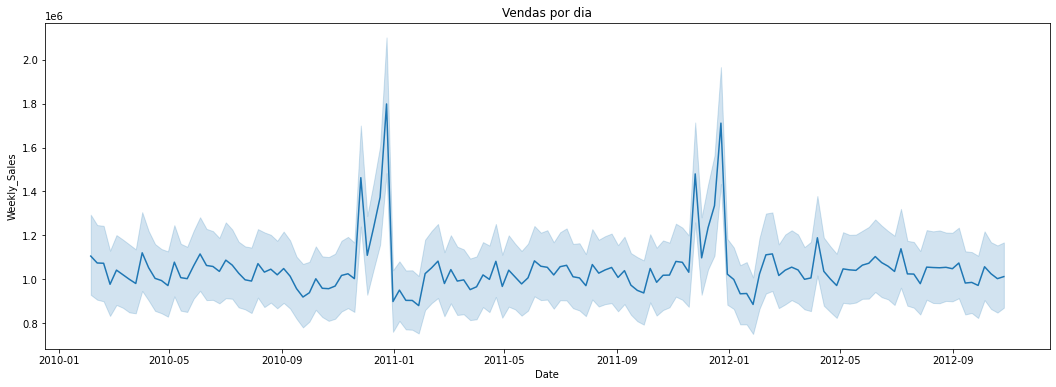

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média entre departamentos e lojas)

plt.figure(figsize=(18,6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas por dia')
plt.show()



In [ ]:
#-- Análise estatística simplificada
df.describe(percentiles=[0.95,0.99,0.995])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
95%,43.000000,2.049179e+06,1.000000,87.663000,4.029000,221.926729,12.187000
99%,45.000000,2.404035e+06,1.000000,93.190000,4.203000,225.470151,14.180000
99.5%,45.000000,2.733138e+06,1.000000,95.610000,4.286980,225.961002,14.313000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


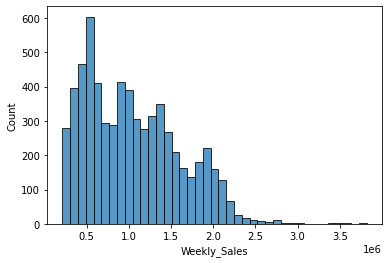

In [ ]:
#-- As vendas semanais estão normalmente entre 0.5 e 1.5 milhõs de dolares
sns.histplot(data=df, x='Weekly_Sales')

# Perguntas importantes

## 1. Qual o preço médio de venda semanal por loja? 

In [ ]:
#-- Agrupar por loja
df_group = df.groupby('Store',as_index=False).mean()
df_group.sort_values('Weekly_Sales',ascending=False)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
19,20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
13,14,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748
12,13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825
1,2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
9,10,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965
26,27,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748
5,6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902
0,1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
38,39,1.450668e+06,0.06993,70.597343,3.219699,214.729069,7.869049


In [ ]:
#-- Selecionar os 5 com maior Média
top5 = df_group.sort_values('Weekly_Sales',ascending=False).Store.to_list()[:5]
top5

[20, 4, 14, 13, 2]

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


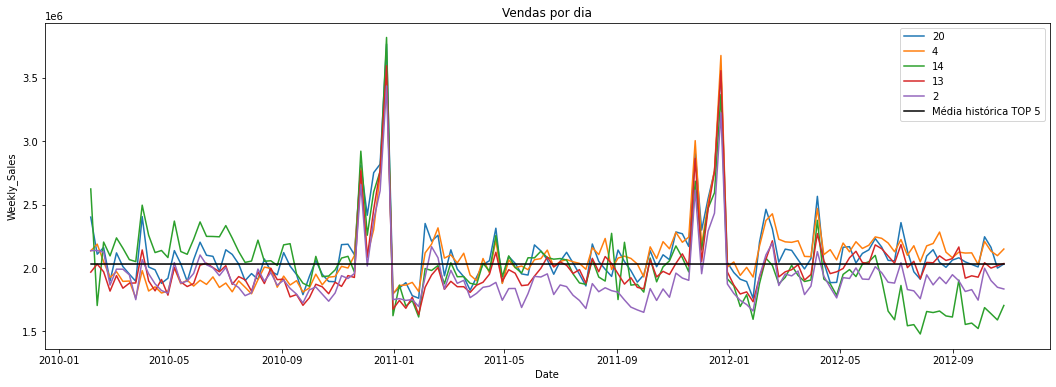

In [ ]:
# Plotando uma relação de Tempo X Venda dos Top 5 acima
plt.figure(figsize=(18,6))
for i in top5:
  sns.lineplot(data=df[df.Store == i], x="Date", y="Weekly_Sales",label=i)


sns.lineplot(data=df, x="Date", y=df[df.Store.isin([20, 4, 14, 13, 2])].Weekly_Sales.mean(),label='Média histórica TOP 5',c='black')


plt.title('Vendas por dia')
plt.show()

## 2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas?

Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Fuel_Price      0.009464
Holiday_Flag    0.036891
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


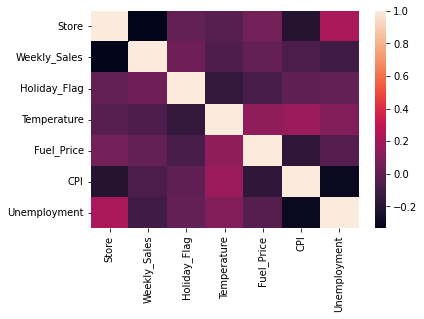

In [ ]:
print(df.corr()['Weekly_Sales'].sort_values())
# Resp: Unemployment com um corr de -0.106. O Store não é parâmetro pois 
# ele representa o ID da loja e não necessariamente o tamanho ou poder de venda
sns.heatmap(df.corr())
plt.show()

## 3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [ ]:
#-- Acumulado
df_acul = df.groupby('Store',as_index=False).sum().sort_values('Weekly_Sales',ascending=False).iloc[0,:]
top_store = df_acul['Store']

# Selecionanto apenas os dados da loja com maior venda (Store 20)
df_top_store = df[df.Store == top_store]
top_mean = df_top_store['Weekly_Sales'].mean()
df_top_store_overmean = df_top_store[df_top_store.Weekly_Sales >= top_mean]
df_top_store_overmean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187
2725,20,2010-04-02,2405395.22,0,51.00,2.850,204.025284,7.856


In [ ]:
print('Semanas totais:',df_top_store.shape[0])
print('Semanas acima da média:',df_top_store_overmean.shape[0])
print(r'{}% das semanas acima da média'.format(round(df_top_store_overmean.shape[0]*100/df_top_store.shape[0],2)))

Semanas totais: 143
Semanas acima da média: 52
36.36% das semanas acima da média


## 4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

In [ ]:
# Dicionário de feriados
holiday_dict = { #Format: %d/%m/%y
'Super Bowl':	['12/02/10', '11/02/11', '10/02/12'],
'Labour Day':	['10/09/10', '09/09/11', '07/09/12'],
'Thanksgiving':	['26/09/10', '25/09/11', '23/09/12'],
'Christmas':	['31/12/10', '30/12/11', '28/12/12']
}

In [ ]:
# Demonstrativo de como acessar os dados no dict
for i in holiday_dict.keys():
  print(i)
  for k in holiday_dict[i]:
    print(k)

Super Bowl
12/02/10
11/02/11
10/02/12
Labour Day
10/09/10
09/09/11
07/09/12
Thanksgiving
26/09/10
25/09/11
23/09/12
Christmas
31/12/10
30/12/11
28/12/12


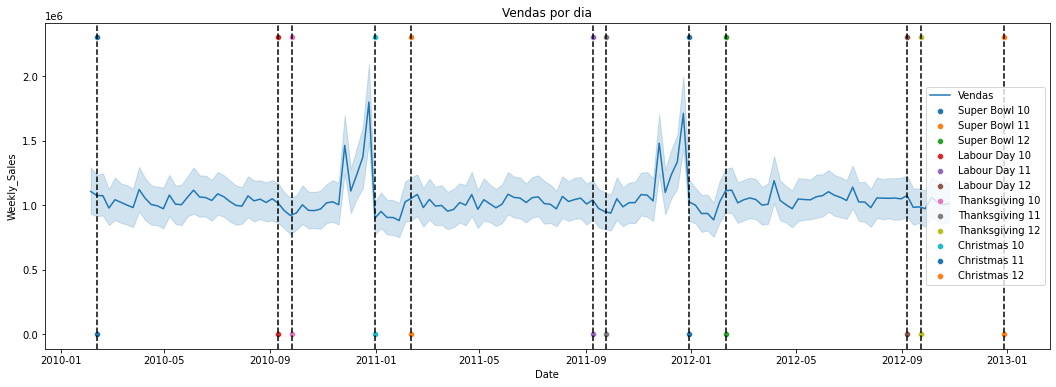

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média)

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", label='Vendas', markers=True, dashes=False)

for i in holiday_dict.keys():
  #print(i)
  for k in holiday_dict[i]:
    #print(k)
    sns.scatterplot(x=[datetime.strptime(k,'%d/%m/%y'),datetime.strptime(k,'%d/%m/%y')],y=[0,2.3*10**6],label=str(i)+ ' ' + k[-2:])
    plt.axvline(datetime.strptime(k,'%d/%m/%y'),0,2.3*10**6,color='black',linestyle='--')


plt.title('Vendas por dia')
plt.show()

## 5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

Como fator de escolha para a pergunta acima, vou escolher a loja que teve um maior rendimento histórico. Ou seja, vou escolher aquela que teve mais semanas com vendas acima da média histórica.

In [ ]:
df_mean = df.groupby('Store',as_index=False).mean()
df_mean = df_mean[['Store','Weekly_Sales']]

In [ ]:
lista_aux = []
lista_aux1 = []
for i in df_mean.Store:
  lista_aux.append(df[df.Store == i].shape[0])
  lista_aux1.append(df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0])

In [ ]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux1
df_mean['Perc'] = df_mean['Bateu']/df_mean['Total']*100
display(df_mean)

,Store,Weekly_Sales,Total,Bateu,Perc
0,1,1.555264e+06,143,56,39.160839
1,2,1.925751e+06,143,53,37.062937
2,3,4.027044e+05,143,64,44.755245
3,4,2.094713e+06,143,62,43.356643
4,5,3.180118e+05,143,56,39.160839
5,6,1.564728e+06,143,56,39.160839
6,7,5.706173e+05,143,61,42.657343
7,8,9.087495e+05,143,56,39.160839
8,9,5.439806e+05,143,61,42.657343
9,10,1.899425e+06,143,47,32.867133


In [ ]:
# Loja escolhida foi a loja 43
df_mean.sort_values('Perc',ascending=False).head()

,Store,Weekly_Sales,Total,Bateu,Perc
42,43,633324.723147,143,73,51.048951
41,42,556403.863147,143,71,49.650350
35,36,373511.992797,143,71,49.650350
36,37,518900.281958,143,69,48.251748
37,38,385731.653287,143,68,47.552448
